<a href="https://colab.research.google.com/github/hosseinrezaie0/ML-Algorithm-Library/blob/main/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
K = 3

In [3]:
# Create random dataset
X = np.random.uniform(0,200, size=(100,2))

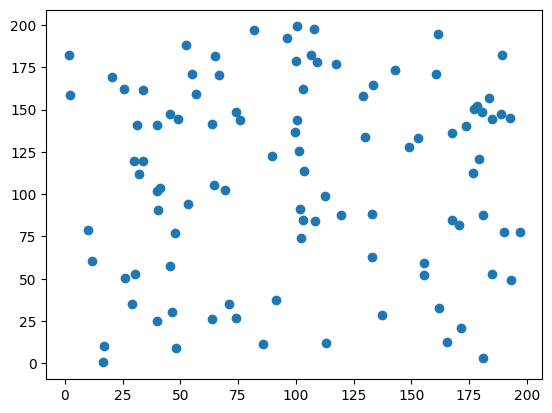

In [4]:
# Plot the dataset
plt.scatter(X[:,0], X[:,1])

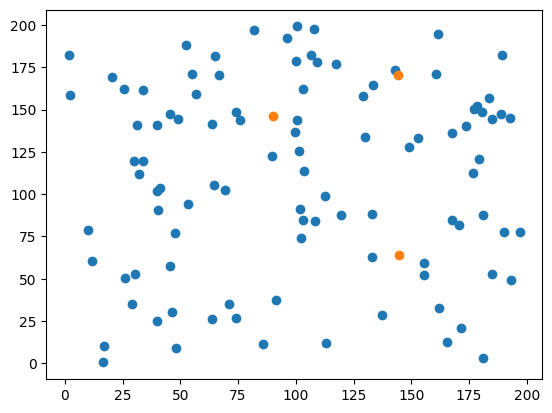

In [5]:
# Choose ranodm centroid
centroids = np.random.uniform(np.amin(X[:,0]), (np.amax(X[:,1])), size=(K,X.shape[1]))
plt.scatter(X[:,0], X[:,1])
plt.scatter(centroids[:,0], centroids[:,1])

In [6]:
# Calculate distance between a data and centroids
def euclidean_distance(data, centroids):
  distances = []
  for i in range(len(centroids)):
    dist = np.sqrt((np.sum(data - centroids[i]) ** 2))
    distances.append(dist)
  return np.argmin(distances)

In [7]:
# Calculate distance between each data and centroids
def find_clusters(X, centroids):
  clusters = []
  for i in range(X.shape[0]):
    clusters.append(euclidean_distance(X[i], centroids))

  clusters = np.array(clusters)
  return clusters

In [12]:
# Find new centers
def find_new_center(X, centroids):
  news = []
  for cluster in range(K):
    news.append(np.mean(X[clusters == cluster], axis=0))
  news = np.array(news)
  return news

In [17]:
# Main loop
while True:
  clusters = find_clusters(X, centroids)
  new_centorids = find_new_center(X, centroids)
  if np.linalg.norm(centroids - new_centorids) < 0.01:
    break
  else:
    centroids = new_centorids

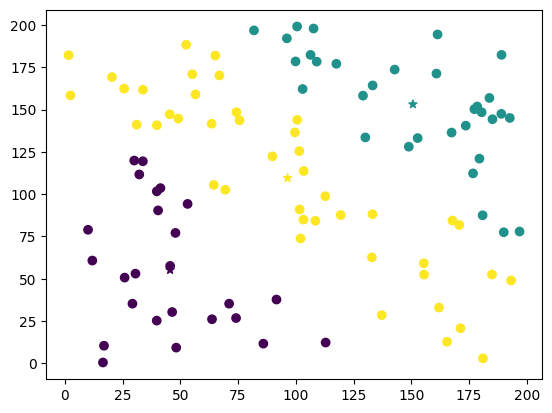

In [18]:
# Plot the clusters
plt.scatter(X[:,0], X[:,1], c=clusters)
plt.scatter(centroids[:,0], centroids[:,1], c=range(len(centroids)), marker='*')